In [1]:
# 1.a) How many days with data do you have for each year, for the years 2016 through 2019
from pyspark import SparkContext


sc = SparkContext('local', 'Assignment 2 ex 1')

try:
    doc = sc.textFile("data.txt")
    freq = doc.flatMap( lambda s : s.split('\t')) \
            .map( lambda s: (int(float(s.split()[0])),1)) \
            .reduceByKey( lambda v1, v2: v1+v2) \
            .filter(lambda t: float(t[0]) in range(2016, 2020)) \
    
    res = freq.collect()
    print('These are the number of days there is per year', res)
finally:
    sc.stop()

    

These are the number of days there is per year [(2016, 252), (2017, 250), (2018, 248), (2019, 250)]


In [2]:
# 1.b) What is the minimum price of crude oil (fifth column) for each year from 2015 through 2020?
from pyspark import SparkContext


sc = SparkContext('local', 'Assignment 2 ex 1')

try:
    doc = sc.textFile("data.txt")
    freq = doc.flatMap( lambda s : s.split('\t')) \
        .map( lambda s: (int(float(s.split()[0])), float(s.split()[-1]))) \
        .reduceByKey( lambda v1, v2: v1 if v1 <= v2 else v2) 
    res = freq.collect()
    print('The minimum value for each year is',res)
finally:
    sc.stop()


The minimum value for each year is [(2015, 34.55), (2016, 26.19), (2017, 42.48), (2018, 44.48), (2019, 46.31), (2020, -36.98)]


In [3]:
# 1.c) What was the date (year, month, day) when the crude oil price fell to the lowest value?

from pyspark import SparkContext
import numpy as np

sc = SparkContext('local', 'Assignment 2 ex 1')

try:
    doc = sc.textFile("data.txt")
    freq = doc.flatMap( lambda s : s.split('\t')) \
            .map( lambda s: ((int(float(s.split()[0])),(int(float(s.split()[1]))), (int(float(s.split()[2])))), float(s.split()[-1]))) \
            .min(lambda x: x[1])
    res = freq
    print('The year, month, day and minimum value is',res)
finally:
    sc.stop()

The year, month, day and minimum value is ((2020, 4, 20), -36.98)


In [4]:
# 1.d) What is the average number of days with data for the years 2016 through 2019?

from pyspark import SparkContext


sc = SparkContext('local', 'Assignment 2 ex 1')

try:
    doc = sc.textFile("data.txt")
    what = doc.flatMap( lambda s : s.split(' ')) \
        .map( lambda s: (float(s),1)) \
        .reduceByKey( lambda v1, v2: v1+v2) \
        .filter(lambda t: float(t[0]) in range(2016, 2020)) \
        .map(lambda s: ((s[1]))).mean()
    res = what
    print(f'The average number of days is',res)
finally:
    sc.stop()

The average number of days is 250.0


In [5]:
from pyspark.sql import SparkSession
spark = SparkSession \
        .builder \
        .master("local[*]") \
        .appName("Assignment 2 ex 2") \
        .getOrCreate()

df = spark.read.load("data_new.txt", format="csv", sep=" ", inferSchema="true", header="true")
df.show()

+------+-----+----+-----------------+-----+
|  year|month| day|           nasdaq|  oil|
+------+-----+----+-----------------+-----+
|2015.0|  9.0|21.0|      4828.950195|46.67|
|2015.0|  9.0|22.0|      4756.720215|46.17|
|2015.0|  9.0|23.0|4752.740234000001|44.53|
|2015.0|  9.0|24.0|       4734.47998|44.94|
|2015.0|  9.0|25.0|           4686.5|45.55|
|2015.0|  9.0|28.0|      4543.970215| 44.4|
|2015.0|  9.0|29.0|      4517.319824|45.24|
|2015.0|  9.0|30.0|      4620.160156|45.06|
|2015.0| 10.0| 1.0|      4627.080078|44.75|
|2015.0| 10.0| 2.0|      4707.779785|45.54|
|2015.0| 10.0| 5.0|4781.259765999999|46.28|
|2015.0| 10.0| 6.0|4748.359863000001|48.53|
|2015.0| 10.0| 7.0|      4791.149902|47.86|
|2015.0| 10.0| 8.0|      4810.790039|49.46|
|2015.0| 10.0| 9.0|      4830.470215|49.67|
|2015.0| 10.0|12.0|4838.640136999999|47.09|
|2015.0| 10.0|13.0|4796.609863000001| 46.7|
|2015.0| 10.0|14.0|      4782.850098|46.63|
|2015.0| 10.0|15.0|      4870.100098|46.38|
|2015.0| 10.0|16.0|      4886.68

In [6]:
df.createOrReplaceTempView("data_new")

In [7]:
df = spark.read.load("data.txt", format="csv", sep=" ", inferSchema="true", header="false")
df.show()

+------+----+----+-----------------+-----+
|   _c0| _c1| _c2|              _c3|  _c4|
+------+----+----+-----------------+-----+
|2015.0| 9.0|21.0|      4828.950195|46.67|
|2015.0| 9.0|22.0|      4756.720215|46.17|
|2015.0| 9.0|23.0|4752.740234000001|44.53|
|2015.0| 9.0|24.0|       4734.47998|44.94|
|2015.0| 9.0|25.0|           4686.5|45.55|
|2015.0| 9.0|28.0|      4543.970215| 44.4|
|2015.0| 9.0|29.0|      4517.319824|45.24|
|2015.0| 9.0|30.0|      4620.160156|45.06|
|2015.0|10.0| 1.0|      4627.080078|44.75|
|2015.0|10.0| 2.0|      4707.779785|45.54|
|2015.0|10.0| 5.0|4781.259765999999|46.28|
|2015.0|10.0| 6.0|4748.359863000001|48.53|
|2015.0|10.0| 7.0|      4791.149902|47.86|
|2015.0|10.0| 8.0|      4810.790039|49.46|
|2015.0|10.0| 9.0|      4830.470215|49.67|
|2015.0|10.0|12.0|4838.640136999999|47.09|
|2015.0|10.0|13.0|4796.609863000001| 46.7|
|2015.0|10.0|14.0|      4782.850098|46.63|
|2015.0|10.0|15.0|      4870.100098|46.38|
|2015.0|10.0|16.0|      4886.689941| 47.3|
+------+---

In [8]:
df.createOrReplaceTempView("data")

In [9]:
spark.sql("(select * from data EXCEPT select * from data_new) UNION ALL (select * from data_new \
            EXCEPT select * from data)").show()

# As we can see from the output, the documents are the same except for the headers. 
# As such, for the remainder of the assignment I will use the data_new.txt.


+---+---+---+---+---+
|_c0|_c1|_c2|_c3|_c4|
+---+---+---+---+---+
+---+---+---+---+---+



In [10]:
# QUESTION 2.a)
# How many days with data do you have for each year, for the years 2016 through 2019?

days_df= spark.sql("select year, count(day) from data_new where year >= 2016 and year <= 2019 group by year order by year")
days_df.show()

+------+----------+
|  year|count(day)|
+------+----------+
|2016.0|       252|
|2017.0|       250|
|2018.0|       248|
|2019.0|       250|
+------+----------+



In [11]:
# QUESTION 2.b)
# What is the minimum price of crude oil (fifth column) for each year from 2015 through 2020?

spark.sql("select year, min(oil) from data_new group by year ORDER BY year").show()

+------+--------+
|  year|min(oil)|
+------+--------+
|2015.0|   34.55|
|2016.0|   26.19|
|2017.0|   42.48|
|2018.0|   44.48|
|2019.0|   46.31|
|2020.0|  -36.98|
+------+--------+



In [12]:
# QUESTION 2.c)
# What was the date (year, month, day) when the crude oil price fell to the lowest value? 

spark.sql("select year, month, day, min(oil) from data_new group by year, month, day order by min(oil) limit 1").show()

+------+-----+----+--------+
|  year|month| day|min(oil)|
+------+-----+----+--------+
|2020.0|  4.0|20.0|  -36.98|
+------+-----+----+--------+



In [46]:
# QUESTION 2.d)
# What is the average number of days with data for the years 2016 through 2019?

spark.sql("select count(day)/count(distinct year) as average_days from data_new where year >= 2016 and year <= 2019").show()


+------------+
|average_days|
+------------+
|       250.0|
+------------+



In [14]:
df.show()

+------+----+----+-----------------+-----+
|   _c0| _c1| _c2|              _c3|  _c4|
+------+----+----+-----------------+-----+
|2015.0| 9.0|21.0|      4828.950195|46.67|
|2015.0| 9.0|22.0|      4756.720215|46.17|
|2015.0| 9.0|23.0|4752.740234000001|44.53|
|2015.0| 9.0|24.0|       4734.47998|44.94|
|2015.0| 9.0|25.0|           4686.5|45.55|
|2015.0| 9.0|28.0|      4543.970215| 44.4|
|2015.0| 9.0|29.0|      4517.319824|45.24|
|2015.0| 9.0|30.0|      4620.160156|45.06|
|2015.0|10.0| 1.0|      4627.080078|44.75|
|2015.0|10.0| 2.0|      4707.779785|45.54|
|2015.0|10.0| 5.0|4781.259765999999|46.28|
|2015.0|10.0| 6.0|4748.359863000001|48.53|
|2015.0|10.0| 7.0|      4791.149902|47.86|
|2015.0|10.0| 8.0|      4810.790039|49.46|
|2015.0|10.0| 9.0|      4830.470215|49.67|
|2015.0|10.0|12.0|4838.640136999999|47.09|
|2015.0|10.0|13.0|4796.609863000001| 46.7|
|2015.0|10.0|14.0|      4782.850098|46.63|
|2015.0|10.0|15.0|      4870.100098|46.38|
|2015.0|10.0|16.0|      4886.689941| 47.3|
+------+---

+----------+-----+------------------+
|      Date|  oil|day_moving_average|
+----------+-----+------------------+
| 2015-9-21|46.67|             46.67|
| 2015-9-22|46.17|             46.42|
| 2015-9-23|44.53|             45.79|
| 2015-9-24|44.94|           45.5775|
| 2015-9-25|45.55|            45.572|
| 2015-9-28| 44.4|45.376666666666665|
| 2015-9-29|45.24|45.357142857142854|
| 2015-9-30|45.06|             45.32|
| 2015-10-1|44.75| 45.25666666666667|
| 2015-10-2|45.54|45.285000000000004|
| 2015-10-5|46.28|45.375454545454545|
| 2015-10-6|48.53| 45.63833333333333|
| 2015-10-7|47.86|45.809230769230766|
| 2015-10-8|49.46|             46.07|
| 2015-10-9|49.67|46.309999999999995|
|2015-10-12|47.09|          46.35875|
|2015-10-13| 46.7| 46.37882352941177|
|2015-10-14|46.63| 46.39277777777778|
|2015-10-15|46.38|46.392105263157895|
|2015-10-16| 47.3|           46.4375|
+----------+-----+------------------+
only showing top 20 rows



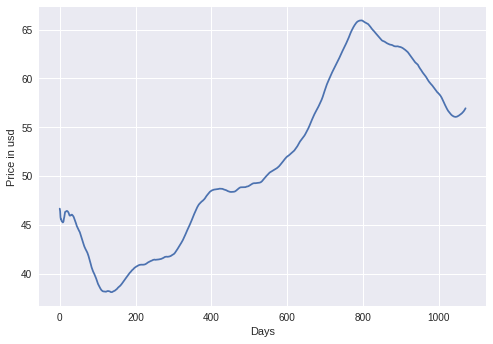

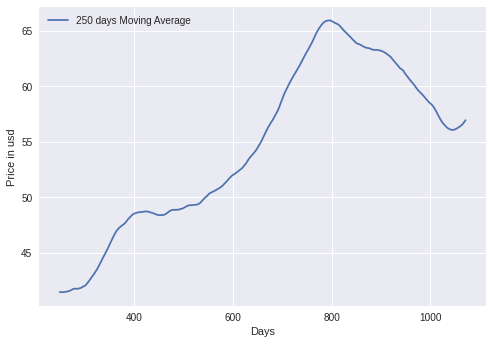

In [45]:
# Question 3 - the data for the oil price from 2016 through 2019, 
# along with a moving average starting from mid 2016 to the end of 2019,
import matplotlib.pyplot as plt

# Selecting Date, the price of oil and its financial moving average of 250 days.
moving_average = spark.sql( '''SELECT CONCAT(int(year), '-', int(month), '-', int(day)) AS Date, oil,
            avg(oil) OVER(ROWS between 250 PRECEDING AND CURRENT ROW ) as day_moving_average
                from data_new where year <= 2019 
                ''' )

moving_average.show()

# Plotting the Moving Average. However, in the exercise we are asked to start in the middle of 2016, 
# more particularly in day 250.
plt.style.use('seaborn')
plt.plot([row.day_moving_average for row in moving_average.collect()])
plt.xlabel('Days')
plt.ylabel('Price in usd')
plt.show()

# Excluding the first 250 rows and plotting the Moving Average. 
pandas_df = moving_average.select("day_moving_average").toPandas()
pandas_df = pandas_df.iloc[250:]
plt.style.use('seaborn')
plt.plot(pandas_df)
plt.xlabel('Days')
plt.ylabel('Price in usd')
plt.legend(['250 days Moving Average'])
plt.show()

+------+-----+----+-----------------+------------------+
|  year|month| day|       nasdaq_usd|         nasdaq_eu|
+------+-----+----+-----------------+------------------+
|2015.0|  9.0|21.0|      4828.950195|     4104.60766575|
|2015.0|  9.0|22.0|      4756.720215|     4043.21218275|
|2015.0|  9.0|23.0|4752.740234000001|4039.8291989000004|
|2015.0|  9.0|24.0|       4734.47998|       4024.307983|
|2015.0|  9.0|25.0|           4686.5|          3983.525|
|2015.0|  9.0|28.0|      4543.970215|     3862.37468275|
|2015.0|  9.0|29.0|      4517.319824|      3839.7218504|
|2015.0|  9.0|30.0|      4620.160156|3927.1361325999997|
|2015.0| 10.0| 1.0|      4627.080078|3933.0180662999996|
|2015.0| 10.0| 2.0|      4707.779785|     4001.61281725|
|2015.0| 10.0| 5.0|4781.259765999999|4064.0708010999992|
|2015.0| 10.0| 6.0|4748.359863000001|4036.1058835500003|
|2015.0| 10.0| 7.0|      4791.149902|      4072.4774167|
|2015.0| 10.0| 8.0|      4810.790039|4089.1715331500004|
|2015.0| 10.0| 9.0|      4830.4

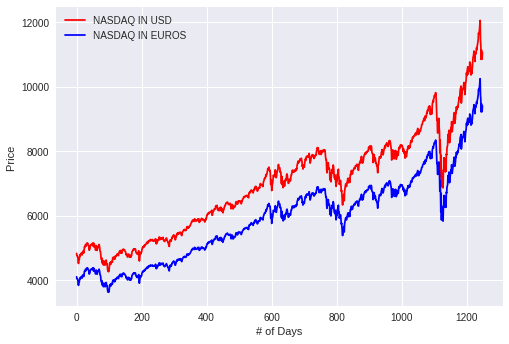

In [51]:
# 4.a) Plot all the data available for the NASDAQ index, both the original value and the value adjusted to Euros.
import matplotlib.pyplot as plt

# exchange rate
euro_dollar = float(1/0.85)
# creating a table with sql with the values of nasdaq in usd and euro.
nasdaq_euro = spark.sql("""SELECT year, month, day, nasdaq as nasdaq_usd, nasdaq*0.85 as nasdaq_eu FROM data_new""")
nasdaq_euro.show()

# Plotting both columns
plt.style.use('seaborn')
plt.plot([row.nasdaq_usd for row in nasdaq_euro.collect()], color='red') 
plt.plot([row.nasdaq_eu for row in nasdaq_euro.collect()], color='blue') 
plt.xlabel('# of Days')
plt.ylabel('Price ')
plt.legend(['NASDAQ IN USD', 'NASDAQ IN EUROS'])
plt.show()


+------+-----+----+-------+--------------------+------------------+--------------------+
|  year|month| day|oil_usd|     growth_rate_usd|            oil_eu|      growth_rate_eu|
+------+-----+----+-------+--------------------+------------------+--------------------+
|2015.0|  9.0|21.0|  46.67|                 0.0|           39.6695|                 0.0|
|2015.0|  9.0|22.0|  46.17| -1.0713520462824084|           39.2445| -1.0713520462824013|
|2015.0|  9.0|23.0|  44.53|  -4.585386758088709|           37.8505|  -4.585386758088714|
|2015.0|  9.0|24.0|  44.94| -3.7068780801371415|            38.199|  -3.706878080137136|
|2015.0|  9.0|25.0|  45.55| -2.3998285836726043|38.717499999999994| -2.3998285836726083|
|2015.0|  9.0|28.0|   44.4|  -4.863938290122141|37.739999999999995|  -4.863938290122145|
|2015.0|  9.0|29.0|  45.24|  -3.064066852367687|            38.454|  -3.064066852367685|
|2015.0|  9.0|30.0|  45.06| -3.4497535890293536|            38.301| -3.4497535890293487|
|2015.0| 10.0| 1.0|  

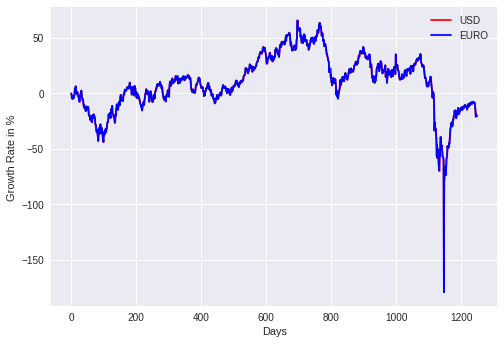

In [178]:
# 4.b) For all data available for the oil price, plot the valorization (in %) 
# from the first day, for both the price in USD and the price adjusted to Euros.

# Making an SQL Table of the growth rate since the first day, both in euros and in usd.
growth_rate = spark.sql("""SELECT year, month, day, oil as oil_usd,
                            ((oil-(SELECT oil FROM data_new LIMIT 1))/(SELECT oil FROM data_new LIMIT 1))*100 as growth_rate_usd,
                            oil*0.85 as oil_eu,
                            ((oil*0.85-(SELECT oil*0.85 FROM data_new LIMIT 1))/(SELECT oil*0.85 FROM data_new LIMIT 1))*100 as growth_rate_eu
                            FROM data_new""")
growth_rate.show()

#Plotting again both columns of growth rate. The difference between each growth rate is minimal, which makes sense.
plt.style.use('seaborn')
plt.plot([row.growth_rate_usd for row in growth_rate.collect()], color='red') 
plt.plot([row.growth_rate_eu for row in growth_rate.collect()], color='blue') 
plt.legend(["USD", "EURO"])
plt.xlabel('Days')
plt.ylabel('Growth Rate in % ')
plt.show()

# QUESTION 5 

spark.sql("SELECT sex, avg(height)FROM heights GROUP BY sex""").explain( mode="formatted")

- 1: Scan the csv document called heights.txt that has two columns.

- 2: limits number of columns to those required: the inputs are the columns and the outputs are those two columns with their respective names (sex#913 and height#916). Basically, it's only selecting the columns needed to perform the aggregations.

- 3: Hash-based aggregator: With the two columns as inputs, it creates keys from the column SEX values' and then sums and counts the number of rows of column HEIGHT. It outputs three columns: sex, sum(height) and count(height). (partial aggregate)

- 4: Exchange means data shuffling.

- 5: Last aggregation: Grouping by sex and calls the function AVERAGE. The result, or output, are two columns: one that has a row for each sex and another that has the average height of each sex.

 

In [52]:
sc = SparkContext.getOrCreate()
sc.stop()